In [28]:
import pandas as pd
import kaplanmeier as km

In [29]:
clinical = pd.read_csv('GSE39582/GSE39582_Clinical.txt', sep='\t')
clinical.head()

,SampleID,age.at.diagnosis_year,braf.mutation,chemotherapy.adjuvant,chemotherapy.adjuvant.type,cimp.status,cin.status,cit.molecularsubtype,dataset,dependancy_sample,...,Sex,tnm.m,tnm.n,tnm.stage,tnm.t,tp53.mutation,tp53.mutation.dna,tp53.mutation.exon.number,tp53.mutation.protein,tumor.location
0,GSM971957,34.5,WT,N,NaN,-,+,C5,discovery,NaN,...,Male,M1,N2,4.0,T4,M,NaN,NaN,NaN,distal
1,GSM971958,36.4,WT,N,NaN,-,-,C4,discovery,NaN,...,Female,M1,N2,4.0,T3,WT,NaN,NaN,NaN,distal
2,GSM971959,36.9,WT,N,NaN,-,-,C3,discovery,NaN,...,Male,M0,N0,2.0,T4,M,NaN,NaN,NaN,proximal
3,GSM971960,38.2,WT,N,NaN,-,+,C1,discovery,NaN,...,Female,M0,N0,1.0,T2,M,NaN,NaN,NaN,distal
4,GSM971961,39.2,WT,Y,NaN,-,NaN,C4,discovery,NaN,...,Female,M1,N1,4.0,T3,M,NaN,NaN,NaN,distal


In [30]:
survival_data = clinical[["SampleID", "braf.mutation", "os.delay", "os.event", "rfs.delay", "rfs.event"]]
survival_data["braf.mutation"] = survival_data["braf.mutation"].map({"WT": 1, "M": 2})

C:\Users\victo\AppData\Local\Temp\ipykernel_34744\1436924317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival_data["braf.mutation"] = survival_data["braf.mutation"].map({"WT": 1, "M": 2})


In [31]:
survival_data.head()

,SampleID,braf.mutation,os.delay,os.event,rfs.delay,rfs.event
0,GSM971957,1.0,10.0,1.0,0.0,1.0
1,GSM971958,1.0,9.0,1.0,0.0,1.0
2,GSM971959,1.0,52.0,0.0,4.0,1.0
3,GSM971960,1.0,74.0,0.0,74.0,0.0
4,GSM971961,1.0,32.0,1.0,1.0,1.0


In [32]:
print(survival_data.shape)
survival_data = survival_data.dropna()
print(survival_data.shape)

(585, 6)
(503, 6)


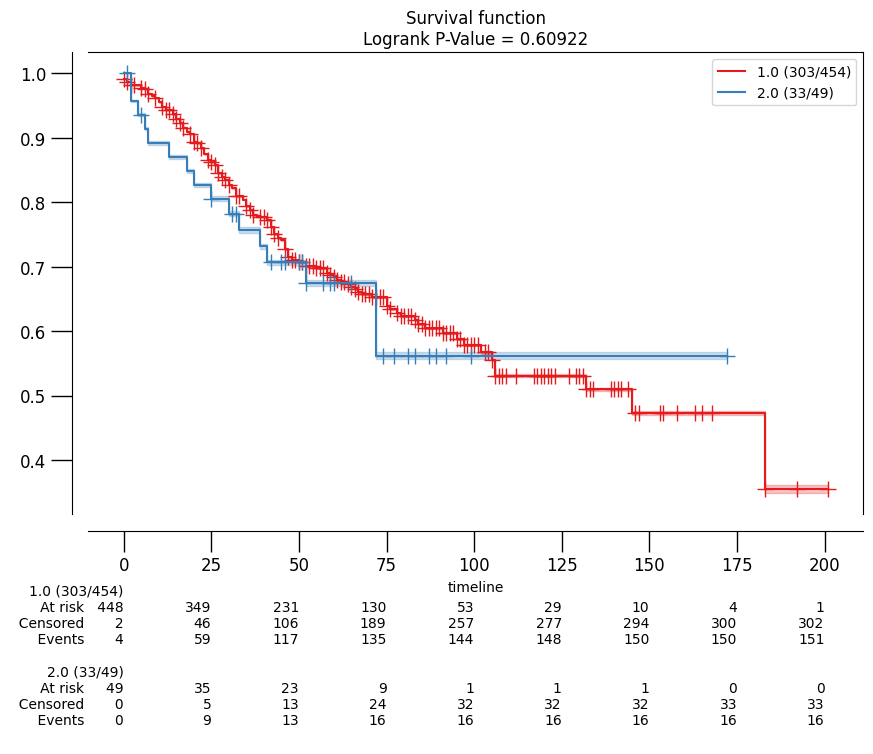

In [33]:
time_event = survival_data["os.delay"]
censoring = survival_data["os.event"]   
group = survival_data["braf.mutation"]

results = km.fit(time_event, censoring, group)
km.plot(results)